In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test.csv to SalaryData_Test (1).csv


In [35]:
test=pd.read_csv('SalaryData_Test.csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [36]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train.csv to SalaryData_Train (1).csv


In [37]:
train=pd.read_csv('SalaryData_Train.csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [40]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [41]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [42]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [43]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [44]:
test.corr()

<ipython-input-44-c06d3b70ad5e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.corr()


,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


In [45]:
train.corr()

<ipython-input-45-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


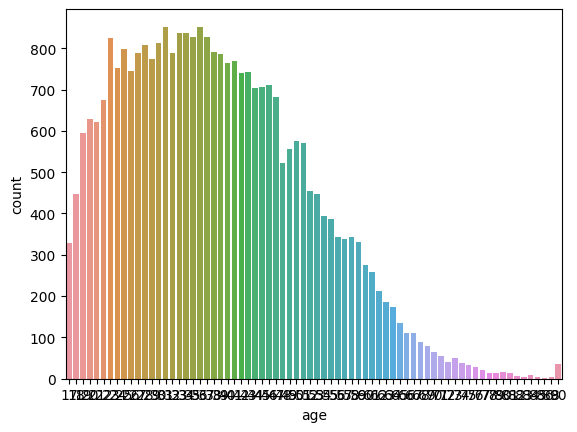

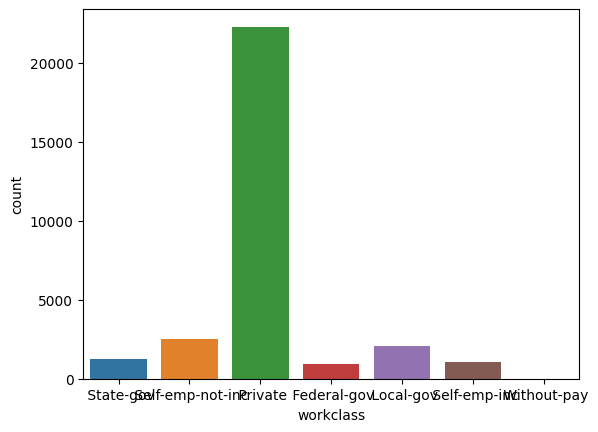

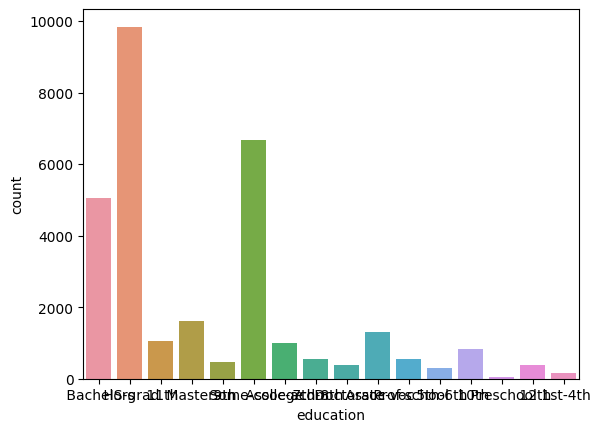

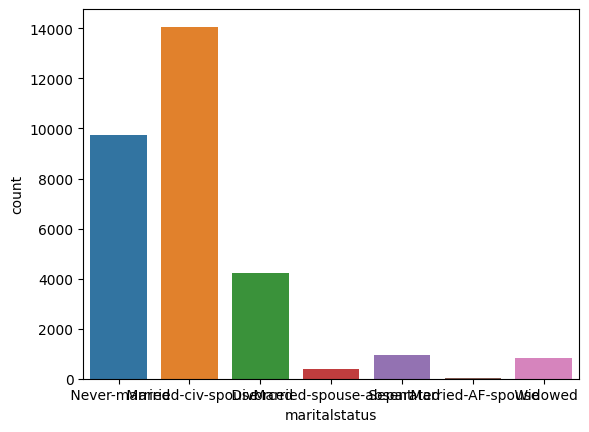

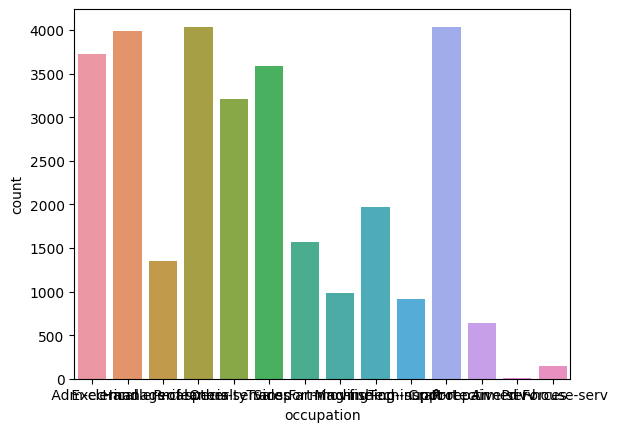

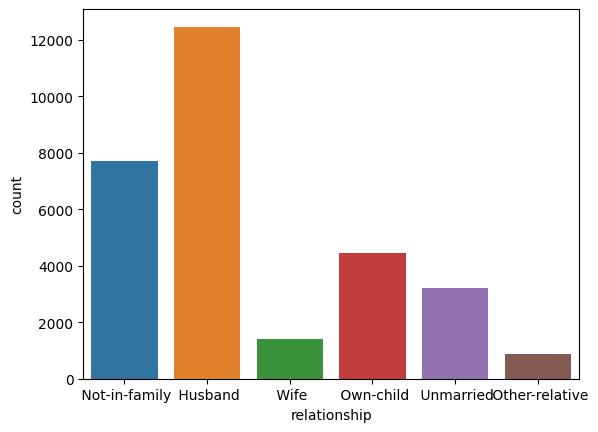

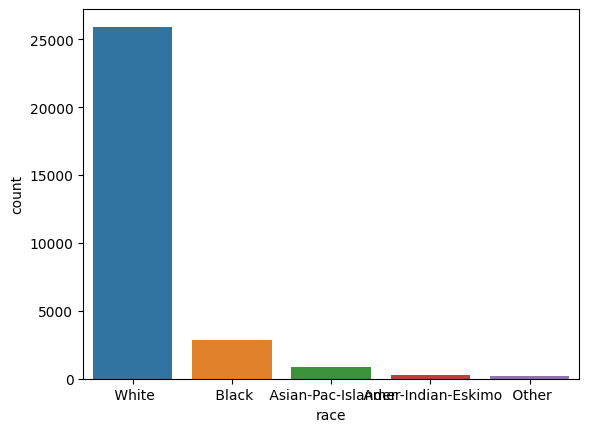

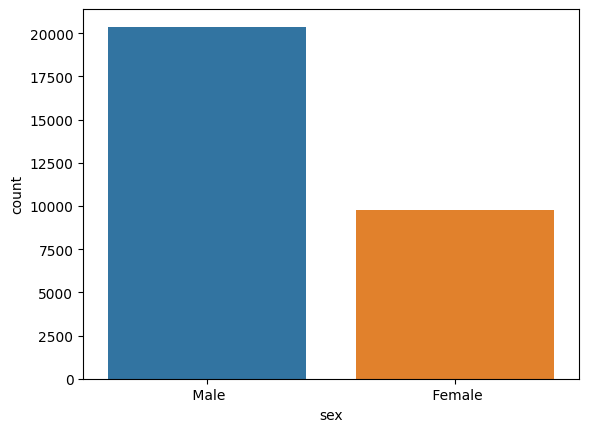

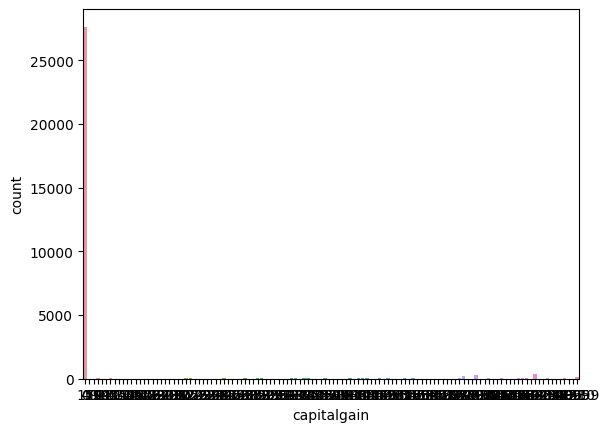

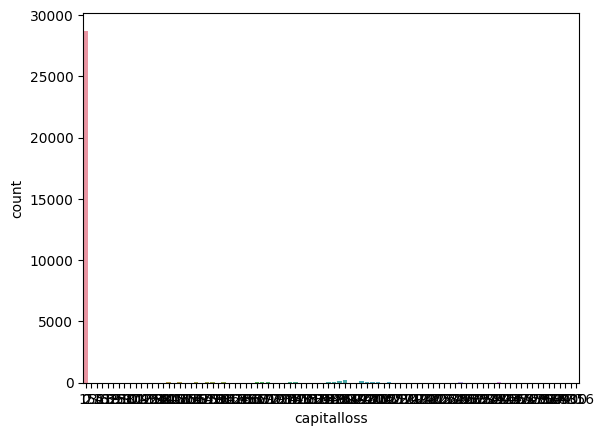

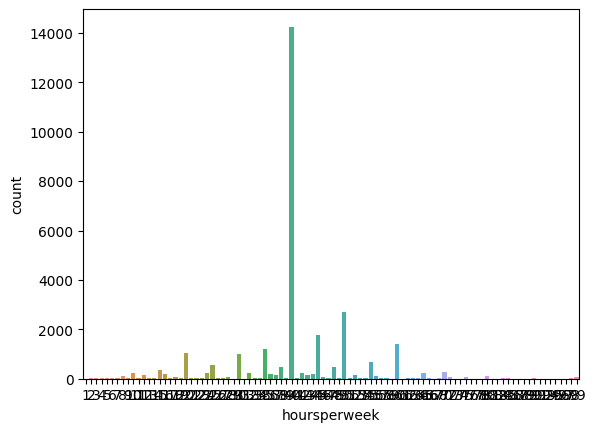

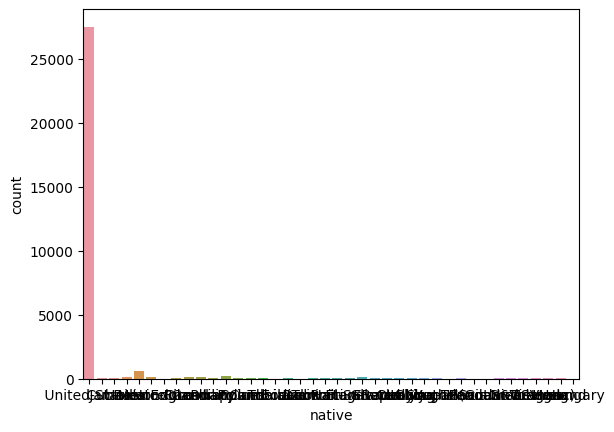

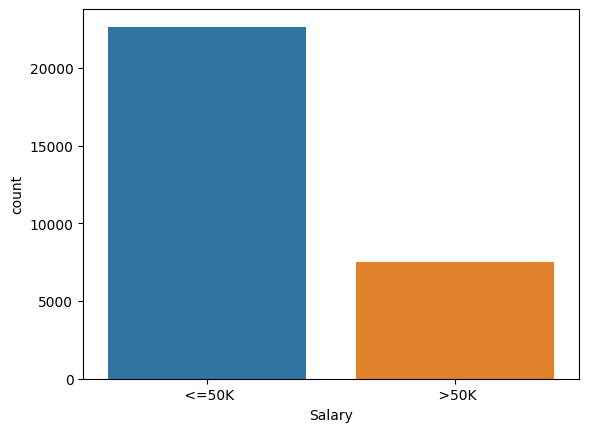

In [46]:
columns=['age','workclass','education','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','native','Salary']
for i in columns:
  plt.figure()
  print(sns.countplot(x=i,data=train))

<ipython-input-47-3abe9c0b5360>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['capitalgain'])


<Axes: xlabel='capitalgain', ylabel='Density'>

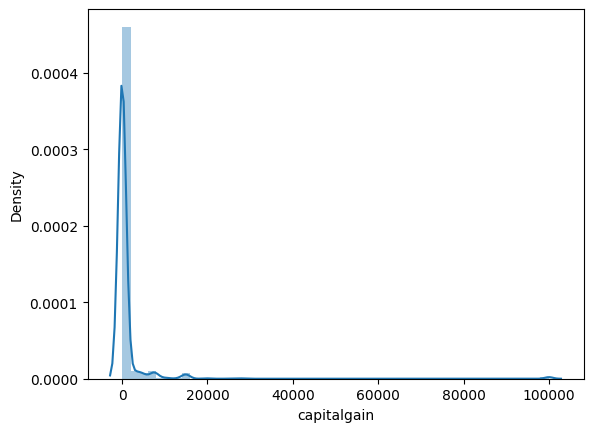

In [47]:
sns.distplot(train['capitalgain'])

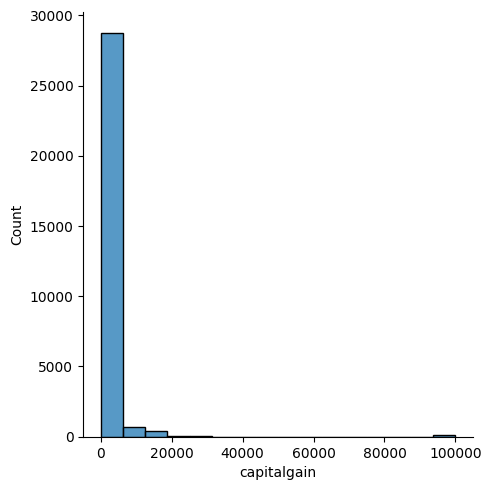

In [48]:
sns.displot(train['capitalgain'])

In [49]:
le=LabelEncoder()
train['Salary']=le.fit_transform(train['Salary'])
train['age']=le.fit_transform(train['age'])
train['workclass']=le.fit_transform(train['workclass'])
train['relationship']=le.fit_transform(train['relationship'])
train['education']=le.fit_transform(train['education'])
train['educationno']=le.fit_transform(train['educationno'])
train['maritalstatus']=le.fit_transform(train['maritalstatus'])
train['capitalgain']=le.fit_transform(train['capitalgain'])
train['capitalloss']=le.fit_transform(train['capitalloss'])
train['hoursperweek']=le.fit_transform(train['hoursperweek'])
train['capitalgain']=le.fit_transform(train['capitalgain'])
train['capitalloss']=le.fit_transform(train['capitalloss'])
train['hoursperweek']=le.fit_transform(train['hoursperweek'])
train['race']=le.fit_transform(train['race'])
train['sex']=le.fit_transform(train['sex'])
train['occupation']=le.fit_transform(train['occupation'])
train['native']=le.fit_transform(train['native'])

In [50]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [51]:
le=LabelEncoder()
test['Salary']=le.fit_transform(test['Salary'])
test['age']=le.fit_transform(test['age'])
test['workclass']=le.fit_transform(test['workclass'])
test['relationship']=le.fit_transform(test['relationship'])
test['education']=le.fit_transform(test['education'])
test['educationno']=le.fit_transform(test['educationno'])
test['maritalstatus']=le.fit_transform(test['maritalstatus'])
test['capitalgain']=le.fit_transform(test['capitalgain'])
test['capitalloss']=le.fit_transform(test['capitalloss'])
test['hoursperweek']=le.fit_transform(test['hoursperweek'])
test['capitalgain']=le.fit_transform(test['capitalgain'])
test['capitalloss']=le.fit_transform(test['capitalloss'])
test['hoursperweek']=le.fit_transform(test['hoursperweek'])
test['race']=le.fit_transform(test['race'])
test['sex']=le.fit_transform(test['sex'])
test['occupation']=le.fit_transform(test['occupation'])
test['native']=le.fit_transform(test['native'])

In [52]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [86]:
xtrain=train.iloc[:,:-1]
xtrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,22,5,9,12,4,0,1,4,1,24,0,39,37
1,33,4,9,12,2,3,0,4,1,0,0,12,37
2,21,2,11,8,0,5,1,4,1,0,0,39,37
3,36,2,1,6,2,5,0,2,1,0,0,39,37
4,11,2,9,12,2,9,5,2,0,0,0,39,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,10,2,7,11,2,12,5,4,0,0,0,37,37
30157,23,2,11,8,2,6,0,4,1,0,0,39,37
30158,41,2,11,8,6,0,4,4,0,0,0,39,37
30159,5,2,11,8,4,0,3,4,1,0,0,19,37


In [87]:
y_train=train.iloc[:,-1:]
y_train

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
30156,0
30157,1
30158,0
30159,0


In [79]:
x_train,x_test,y_train,y_test=train_test_split(xtrain,y_train,test_size=0.2)


In [80]:
nb_train=MultinomialNB()
nb_train.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [81]:
nb_train.score(x_train,y_train)

0.7800895225464191

In [83]:
x_test=test.iloc[:,:-1]
x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,8,2,1,6,4,6,3,2,1,0,0,39,37
1,21,2,11,8,2,4,0,4,1,0,0,49,37
2,11,1,7,11,2,10,0,4,1,0,0,39,37
3,27,2,15,9,2,6,0,2,1,87,0,39,37
4,17,2,0,5,4,7,1,4,1,0,0,29,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37
15056,22,2,9,12,0,9,1,4,0,0,0,35,37
15057,21,2,9,12,2,9,0,4,1,0,0,49,37
15058,27,2,9,12,0,0,3,1,1,73,0,39,37


In [95]:
y_test=test.iloc[:,-1:]
y_test

,Salary
0,0
1,0
2,1
3,1
4,0
...,...
15055,0
15056,0
15057,0
15058,0


In [96]:
prediction=nb_train.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 1, 0])

In [97]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87     11360
           1       0.60      0.30      0.40      3700

    accuracy                           0.78     15060
   macro avg       0.70      0.62      0.63     15060
weighted avg       0.76      0.78      0.75     15060



In [98]:
accuracytest=accuracy_score(y_test,prediction)
accuracytest

0.7800132802124834

**GaussianNB** model

In [107]:
modelgaussian=GaussianNB()
modelgaussian.fit(xtrain,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [109]:
y_pred_trainNB=modelgaussian.score(xtrain,y_train)
y_pred_trainNB


0.8120751964457412

In [110]:
x_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1:]

In [112]:
new_predict=modelgaussian.predict(x_test)
new_predict

array([0, 0, 0, ..., 1, 1, 1])

In [113]:
Accu_test_ds=accuracy_score(y_test,new_predict)
Accu_test_ds


0.8146746347941567

Gaussian **model** **gives** **the** **higher** **accuracy**